# Scania Trucks Classification using Logistic Regression 

In [11]:
import pandas as pd
from math import e
import numpy as np
import scipy.stats as s
import random
import matplotlib.pyplot as plt
from time import time
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler

In [2]:
TrainData = pd.read_csv("aps_failure_training_set.csv")
TrainData.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [3]:
sc = StandardScaler()

In [4]:
TrainData.replace('na','-1',inplace=True)

X_TrainData = TrainData.iloc[:,1:]
X_TrainData.astype('float64')
X_TrainData = sc.fit_transform(np.array(X_TrainData))
print(X_TrainData)
Y_TrainData = []
for i in range(TrainData.shape[0]):
    if TrainData.iloc[i,0] == 'neg':
        Y_TrainData.append(0)
    else:
        Y_TrainData.append(1)
Y_TrainData = np.array(Y_TrainData)
print(Y_TrainData.shape)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[[ 0.11938141 -0.21573619  2.31022415 ... -0.17569836 -0.0096073
  -0.01827212]
 [-0.18069661 -0.21573619 -0.43285893 ... -0.14392684 -0.0096073
  -0.01827212]
 [-0.12581066 -0.21573619 -0.43285864 ... -0.16481132 -0.0096073
  -0.01827212]
 ...
 [-0.40724039  0.33693754  2.31022414 ... -0.17569836 -0.0096073
  -0.01827212]
 [ 0.14409453 -0.21573619  2.31022414 ...  8.05147329 -0.0096073
  -0.01827212]
 [-0.13143541 -0.21573619 -0.43285803 ... -0.17235176 -0.0096073
  -0.01827212]]
(60000,)


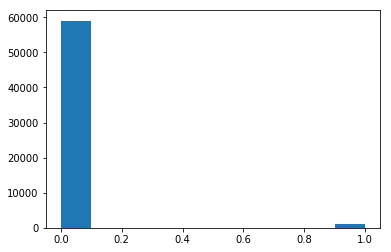

In [5]:

plt.hist(Y_TrainData)
plt.show()

In [6]:
TestData = pd.read_csv("aps_failure_test_set.csv",skiprows=20,keep_default_na=False)
TestData.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


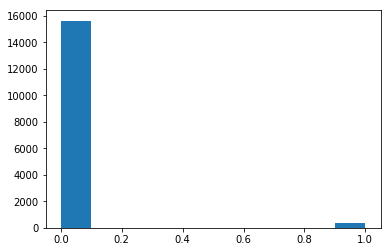

(16000,)


In [7]:
TestData.replace('na',-1,inplace=True)
X_TestData = TestData.iloc[:,1:]
X_TestData.astype('float64')
X_TestData = sc.fit_transform(np.array(X_TestData))

Y_TestData = []
for i in range(TestData.shape[0]):
    if TestData.iloc[i,0] == 'neg':
        Y_TestData.append(0)
    else:
        Y_TestData.append(1)
Y_TestData = np.array(Y_TestData)
plt.hist(Y_TestData)
plt.show()
print(Y_TestData.shape)

In [8]:

def sigmoid(z):
    return 1/(1 + e**(-z))



In [9]:
def logistic_regression(X,Y,Total_Steps,learning_rate):
    
    #To add X0 to train data i.e theta0(intercept)
    intercept = np.ones((X.shape[0],1))
    X = np.concatenate((intercept,X),axis = 1)
    X = np.array(X,dtype=float)
    
    #Taking coefficients(thetas) as ZERO initially
    theta = np.zeros(X.shape[1])
    theta = np.array(theta,dtype=float)

    
    
    for i in range(Total_Steps):
        z = np.dot(X,theta)
        z = np.array(z,dtype=float)
        h = sigmoid(z)
        gradient = np.dot(X.T,Y - h)
        theta = theta + learning_rate*gradient
        
    return theta

In [12]:
start = time()
Total_steps = 10000
alpha = 0.1

theta = logistic_regression(X_TrainData,Y_TrainData,Total_steps,alpha)
print("Time Taken: ",time() - start)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


Time Taken:  355.3701157569885


In [13]:
print(theta)

[-1.09814409e+04  3.33300899e+03 -6.66003745e+01  7.34476527e+02
 -1.78494935e+01 -2.36283376e+02  1.67635597e+02 -4.48438560e+03
  6.86484675e+02 -3.18055875e+02  5.67640917e+03 -1.65421062e+03
  1.15907906e+02  7.02673581e+01  9.69403163e+01 -3.15241573e+02
  8.35167035e+01 -4.65741240e+02 -2.09890839e+01 -3.79407658e+02
  1.34295689e+02  1.79757431e+03 -1.11474553e+03  1.05498320e+03
 -2.51971949e+03 -1.68891757e+01  6.13887831e+03 -3.13890827e+01
  4.41247722e+01  7.56646504e+02  1.29347097e+02  4.29453652e+02
 -6.17276101e+02  1.24980481e+02  4.11857611e+02  1.22142861e+03
 -5.14643674e+02  3.30694360e+02  1.32379044e+03 -1.13711084e+03
 -9.23949362e+02  1.35777274e+03  1.32507974e+03 -1.84950549e+02
  6.16799456e+02 -5.03898130e+02  7.98887919e+02  2.33050126e+02
 -2.18529241e+02 -4.04980822e+02  2.97599678e+02 -2.81028405e+01
  1.03216111e+02  1.03571081e+03 -8.50820006e+02 -6.99319361e+00
 -6.12720156e+02  1.66335044e+03  7.62584655e+01 -1.64222929e+03
 -4.67237902e+02 -1.74436

In [14]:
intercept = np.ones((X_TestData.shape[0],1))
XTest = np.concatenate((intercept,X_TestData),axis = 1)
XTest = np.array(XTest,dtype=float)

test_z = np.dot(XTest,theta)
predictions = sigmoid(test_z)
predictions = np.around(predictions)
predictions

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


array([0., 0., 0., ..., 0., 0., 0.])

In [15]:
accuracy = predictions[Y_TestData == predictions].shape[0]/predictions.shape[0]
print(" {}%".format(accuracy*100))

 98.89375%


In [16]:
print("Wrongly predicted: ",predictions[Y_TestData != predictions].shape[0])

Wrongly predicted:  177
